In [14]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

import warnings
warnings.filterwarnings("ignore")

In [15]:
# import data

df = pd.read_csv("/kaggle/input/abalone/abalone.csv")
df.shape

(4177, 9)

# Inspect Data

In [16]:
# inspect attributes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diam            4177 non-null   float64
 3   height          4177 non-null   float64
 4   weight          4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   age             4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [17]:
df.head()

,sex,length,diam,height,weight,shucked_weight,viscera_weight,shell_weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Visualizations

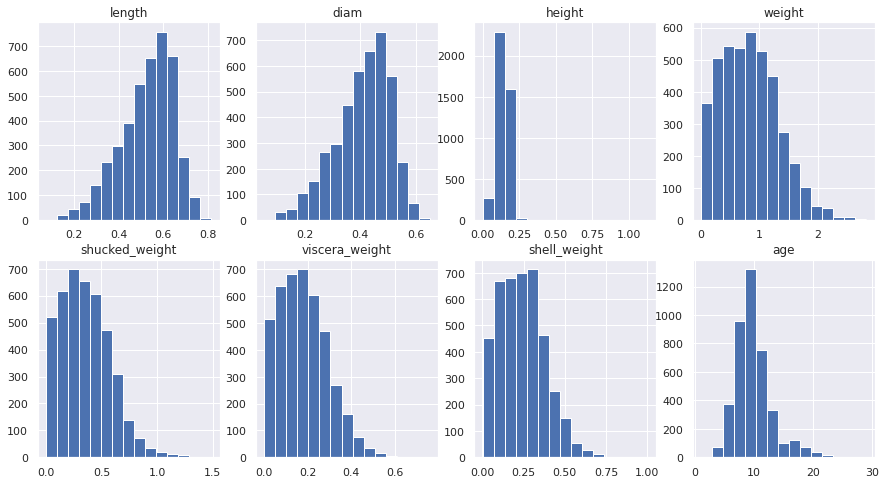

In [18]:
# histograms

fig, ax = plt.subplots(2, 4, figsize = (15, 8))

k = 15

ax[0][0].hist(df["length"], bins=k)
ax[0][0].set_title("length")

ax[0][1].hist(df["diam"], bins = k)
ax[0][1].set_title("diam")

ax[0][2].hist(df["height"], bins = k)
ax[0][2].set_title("height")

ax[0][3].hist(df["weight"], bins = k)
ax[0][3].set_title('weight')

ax[1][0].hist(df["shucked_weight"], bins=k)
ax[1][0].set_title("shucked_weight")

ax[1][1].hist(df["viscera_weight"], bins = k)
ax[1][1].set_title("viscera_weight")

ax[1][2].hist(df["shell_weight"], bins = k)
ax[1][2].set_title("shell_weight")

ax[1][3].hist(df["age"], bins = k)
ax[1][3].set_title('age')

plt.show()

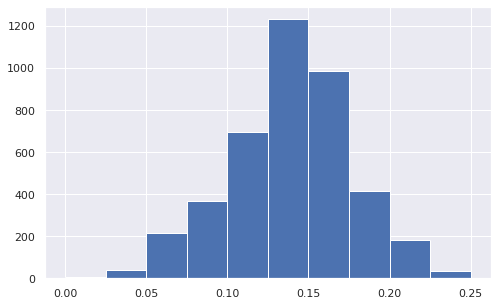

In [19]:
df = df[df['height'] < 0.5]
df['height'].hist(figsize=(8,5));

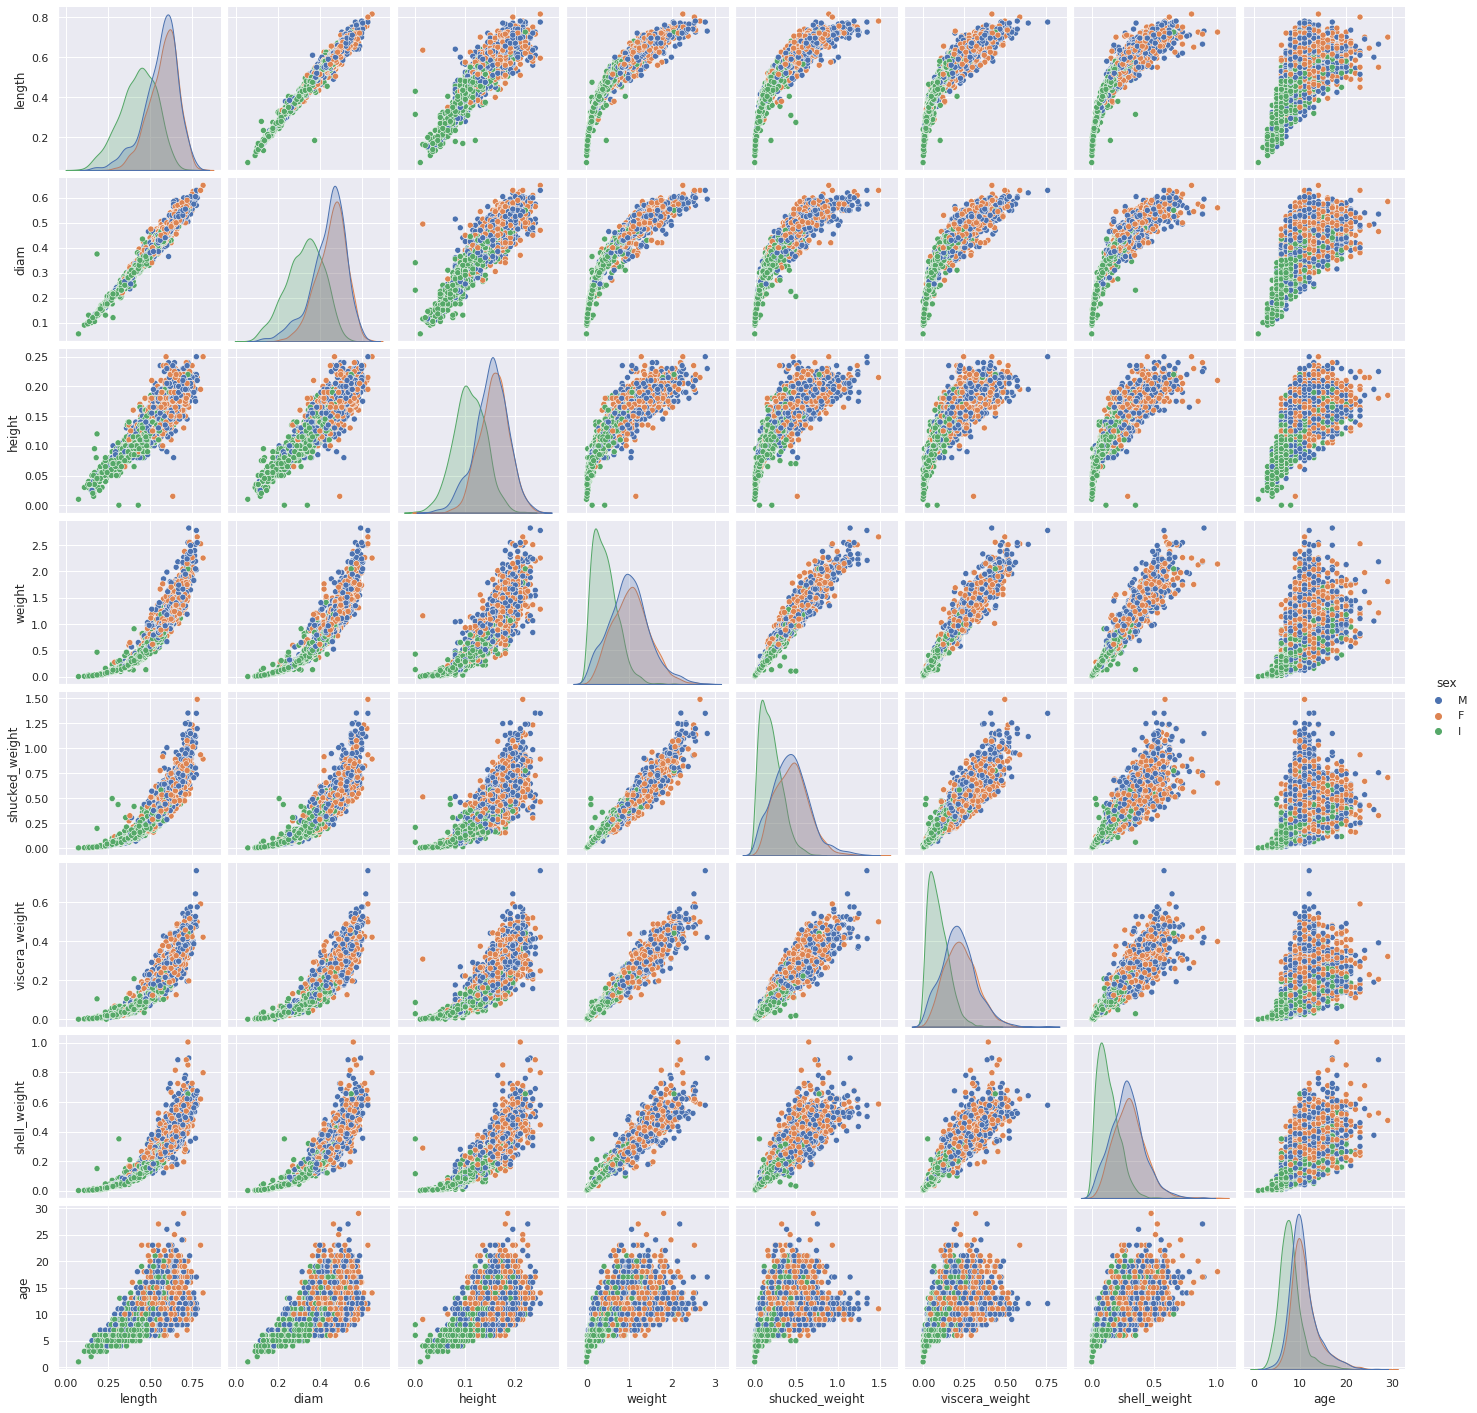

In [20]:
# pair plot

_ = sns.pairplot(df, hue="sex")

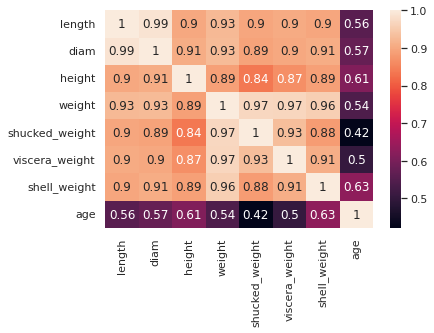

In [21]:
df2 = df.drop(['sex'], axis=1)
sns.heatmap(df2.corr(), annot=True);

In [22]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['sex'])
tf = le.transform(df['sex'])
df['sex'] = tf
df.head()

,sex,length,diam,height,weight,shucked_weight,viscera_weight,shell_weight,age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Split Data Into Train and Test Set

In [23]:
# split input and output into X and y

array = df.values
X = array[:,:8]
y = array[:,8]

In [24]:
# split train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3, shuffle=True, random_state=123)

# Run Regression Algos Upon Training Set

In [25]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

models = []
models.append(('DT', DecisionTreeRegressor()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('LAS', Lasso()))
models.append(('LIN', LinearRegression()))
models.append(('RID', Ridge()))
models.append(('SVR', SVR(gamma='auto')))

results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=10, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

DT: -8.941607 (0.985156)
EN: -9.675736 (1.326882)
KNN: -5.026316 (0.867403)
LAS: -10.472702 (1.474444)
LIN: -4.900848 (0.717532)
RID: -4.937755 (0.617703)
SVR: -6.092422 (0.537264)


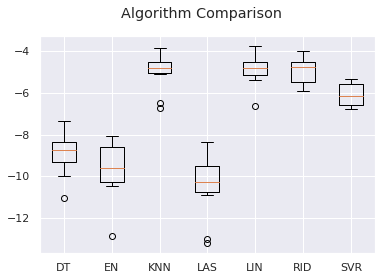

In [26]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Run Ensemble Algos Upon Training Set

In [27]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor

num_folds = 10
seed = 7
scoring = 'accuracy'

ensembles = []
ensembles.append(('AB', AdaBoostRegressor()))
ensembles.append(('GBM', GradientBoostingRegressor()))
ensembles.append(('RF', RandomForestRegressor(n_estimators=10)))
ensembles.append(('ET', ExtraTreesRegressor(n_estimators=10)))
ensembles.append(('BG', BaggingRegressor()))

results = []
names = []
for name, model in ensembles:
	kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

AB: -8.047297 (0.519976)
GBM: -4.698894 (0.609734)
RF: -5.236966 (0.513357)
ET: -5.240091 (0.599117)
BG: -5.100669 (0.509863)


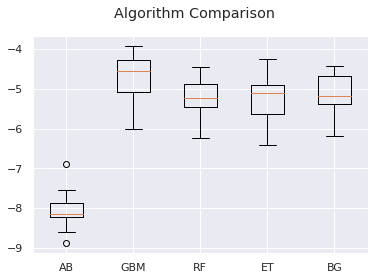

In [28]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Tuning

### KNN

In [29]:
from sklearn.model_selection import GridSearchCV

Ns = np.array([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
param_grid = dict(n_neighbors=Ns)
model = KNeighborsRegressor()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=30, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)
print("KNN Grid Search")
print(grid.best_score_)
print(grid.best_estimator_.n_neighbors)

KNN Grid Search
-4.849876179169333
14


### Ridge Regression

In [30]:
alphas = np.array([100,10,1,0.1,0.01,0.001])
param_grid = dict(alpha=alphas)
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=30, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)
print("Ridge Regression Grid Search")
print(grid.best_score_)
print(grid.best_estimator_.alpha)

Ridge Regression Grid Search
-4.881278795305155
0.01


### Gradient Boosting

In [31]:
LRs = np.array([100,10,1,0.1,0.01,0.001])
n_est = np.array([10,100])
param_grid = dict(learning_rate=LRs, n_estimators=n_est)
model = GradientBoostingRegressor()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=30, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)
print("Gradient Boosting Regression Grid Search")
print(grid.best_score_)
print(grid.best_estimator_.learning_rate)
print(grid.best_estimator_.n_estimators)

Gradient Boosting Regression Grid Search
-4.702019559809956
0.1
100


# Check Tuned Models Against Test Set

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

models = []
models.append(('KNN', KNeighborsRegressor(n_neighbors=13)))
models.append(('LIN', LinearRegression()))
models.append(('RID', Ridge(alpha=0.1)))
models.append(('GBM', GradientBoostingRegressor(learning_rate=0.1,n_estimators=100)))
print("Mean Squared Error, Test Set:")

for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    names.append(name)
    print(name, round(mean_squared_error(y_test, predictions),3), round(r2_score(y_test,predictions),3))

Mean Squared Error, Test Set:
KNN 4.907 0.52
LIN 4.86 0.525
RID 4.878 0.523
GBM 4.888 0.522


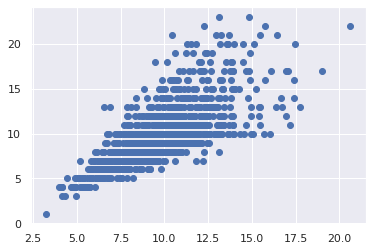

In [33]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
plt.scatter(predictions,y_test);